### Testing Wind Speed -> Wind Power conversion ###

Based on Hannah's S2S4E and CLEARHEADS scripts. First load bias corrected dcppA-hindcast data from HadGEM3-GC31-MM, then use power law to convert from 10m wind speeds to 100m wind speeds (for now), and then convert into wind power and compare to ERA5.

In [1]:
# cell magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load local modules
import os
import sys
import glob
import importlib

# Import external modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# Import the functions
sys.path.append("/home/users/benhutch/unseen_functions")

import functions_demand as func_dm

import bias_functions as bias_func

import load_wind_functions as lw_func

In [3]:
# import dictionaries
sys.path.append("/home/users/benhutch/unseen_functions")

import unseen_dictionaries as udicts

In [4]:
# set up the global variables - loading for a single country
first_year = 1960
last_year = 1960
first_month = 1
last_month = 1
init_years = np.arange(1960, 2018 + 1, 1)
variable = "sfcWind"
lead_time = 1
obs_variable = "si100_bc" # use bc 100m winds for obs
country = "United Kingdom"
country_name = "United_Kingdom"

# Set up the path to the obs
# observations from ERA5 containing 10m wind speeds (si10)
# and bias corrected 100m wind speeds (si100_bc)
# obs_path = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_wind_daily_1960_2020.nc"

# Smaller obs path for testing
# process in smaller chunks
obs_path = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_si100_bc_daily_1960_2020.nc"

# Set up the path to the test file
test_file = "/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/s1960-r1i1p1f2/day/sfcWind/gn/files/d20200417/sfcWind_day_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r1i1p1f2_gn_19601101-19601230.nc"

In [5]:
%%time
# Load the observations
test_model_ds = xr.open_dataset(test_file)

# Load and regrid the observations
obs_ds = bias_func.load_and_rg_obs(
    model_ds=test_model_ds,
    obs_variable=obs_variable,
    obs_path=obs_path,
    init_years=init_years,
    lead_time=lead_time,
    rg_algo="bilinear",
    grid_bounds=[-180.0, 180.0, -90.0, 90.0],
    periodic=True,
    parallel=False,
)

CPU times: user 5.15 s, sys: 1.2 s, total: 6.35 s
Wall time: 6.87 s


In [6]:
%%time

# Select the gridbox
obs_ds = bias_func.select_gridbox(
    ds=obs_ds,
    grid=udicts.eu_grid_constrained,
    calc_mean=False,
)

CPU times: user 3.9 ms, sys: 3 µs, total: 3.91 ms
Wall time: 3.72 ms


In [7]:
%%time

# Apply the country mask to the obs data
obs_ds = lw_func.apply_country_mask(
    ds=obs_ds,
    country=country,
    lon_name="lon",
    lat_name="lat",
)

Found the country!
Pre-country mask
<xarray.DataArray (y: 324, x: 432)>
dask.array<getitem, shape=(324, 432), dtype=float64, chunksize=(324, 432), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1960-11-01
    lon      (x) float64 -179.6 -178.8 -177.9 -177.1 ... 177.1 177.9 178.7 179.6
    lat      (y) float64 -89.72 -89.17 -88.61 -88.06 ... 88.06 88.61 89.17 89.72
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear
[-179.58333336 -178.75000007 -177.91666678 -177.0833335  -176.25000021
 -175.41666693 -174.58333364 -173.75000035 -172.91666707 -172.08333378
 -171.2500005  -170.41666721 -169.58333392 -168.75000064 -167.91666735
 -167.08333406 -166.25000078 -165.41666749 -164.58333421 -163.75000092
 -162.91666763 -162.08333435 -161.25000106 -160.41666778 -159.58333449
 -158.7500012  -157.91666792 -157.08333463 -156.25000134 -155.41666806
 -154.58333477 -153.75000149 -152.9166682  -152.08333491 -151.25000163
 -150.41666834 -149.58333506 -148.75000

In [8]:
obs_ds

<xarray.DataArray (time: 21548, y: 324, x: 432)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1960-11-01 1960-11-02 ... 2019-10-30
    lon      (x) float64 -179.6 -178.8 -177.9 -177.1 ... 177.1 177.9 178.7 179.6
    lat      (y) float64 -89.72 -89.17 -88.61 -88.06 ... 88.06 88.61 89.17 89.72
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [9]:
importlib.reload(lw_func)

<module 'load_wind_functions' from '/home/users/benhutch/unseen_functions/load_wind_functions.py'>

In [10]:
%%time

# Test the function for creating the wind power data
cfs, wind_speed_pre , _ = lw_func.create_wind_power_data(
    ds=obs_ds,
    country=country_name,
    ons_ofs="ofs", # test offshore for now
    onshore_curve_file="/home/users/benhutch/Hannah_model/power_onshore.csv",
    offshore_curve_file="/home/users/benhutch/Hannah_model/power_offshore.csv",
    installed_capacities_dir="/home/users/benhutch/Hannah_model/installed_capacities/",
    lat_name="lat",
    lon_name="lon",
    obs_flag=True,
)

Loading in the installed capacities for offshore wind farms.
Lats and lons are not the same.
Interpolating installed capacities to the same grid as the wind speed data.


/home/users/benhutch/unseen_functions/load_wind_functions.py:847: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  power_curve = pd.read_csv(offshore_curve_file, header=None, sep="  ")


ic_cube: totals / (unknown)                  (latitude: 214; longitude: 304)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
bc_si100_cube: unknown / (unknown)                 (time: 21548; latitude: 324; longitude: 432)
    Dimension coordinates:
        time                             x                -               -
        latitude                         -                x               -
        longitude                        -                -               x
    Attributes:
        regrid_method               'bilinear'
Total MW shape: (214, 304)
Installed capacity: 10.3218 for United_Kingdom
Loading in the offshore power curve.
Power curve:              0         1
0     0.000000  0.000000
1     0.867818  0.000207
2     1.197841  0.001802
3     1.491166  0.001792
4     1.784469  0.003802
..         ...       ...
117  28.863661 -0.000861
118  29.383644 -0.000879
119  29

Creating wind power data: 100%|██████████| 21548/21548 [00:59<00:00, 359.55it/s]


CPU times: user 1min 21s, sys: 1min 13s, total: 2min 35s
Wall time: 2min 39s


In [11]:
cfs.shape

(21548,)

In [12]:
wind_speed_pre.shape

(21548,)

In [13]:
obs_ds["time"].values

array(['1960-11-01T00:00:00.000000000', '1960-11-02T00:00:00.000000000',
       '1960-11-03T00:00:00.000000000', ...,
       '2019-10-28T00:00:00.000000000', '2019-10-29T00:00:00.000000000',
       '2019-10-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
# create a dataframe of the wind speeds
obs_ws_cfs_ofs_df = pd.DataFrame({
    "time": obs_ds["time"].values,
    "wind_speed": wind_speed_pre,
    "cfs": cfs,
})

In [15]:
obs_ws_cfs_ofs_df.tail()

,time,wind_speed,cfs
21543,2019-10-26,8.963854,0.526947
21544,2019-10-27,8.090914,0.440908
21545,2019-10-28,5.917435,0.166644
21546,2019-10-29,6.954676,0.312611
21547,2019-10-30,7.278067,0.361351


In [16]:
# replace the name of wind speed with obs_wind_speed_100m_bc
obs_ws_cfs_ofs_df.rename(columns={"wind_speed": "obs_wind_speed_100m_bc"}, inplace=True)

# replace the name of cfs with obs_cfs_ons
obs_ws_cfs_ofs_df.rename(columns={"cfs": "obs_cfs_ofs"}, inplace=True)

In [17]:
# set up the save dir
save_dir = "/gws/nopw/j04/canari/users/benhutch/met_to_energy_dfs/"

# set up the fname
fname = f"{country_name}_obs_wind_speed_cfs_ofs.csv"

# set up the save path
save_path = os.path.join(save_dir, fname)

# save the dataframe
obs_ws_cfs_ofs_df.to_csv(save_path, index=False)

In [12]:
wind_speed_post_obs = wind_speed_post

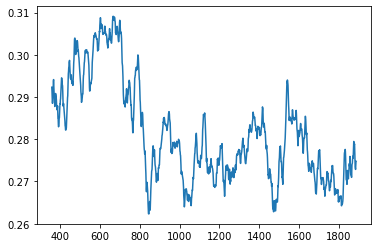

In [13]:
import pandas as pd

# Convert numpy array to pandas Series
obs_ds_series = pd.Series(cfs)

# # Apply a rolling mean (smooth) with a window size of 30
smoothed_obs_ds = obs_ds_series.rolling(window=360).mean()

# plot this with a smoothing of 30
fig, ax = plt.subplots()
plt.plot(smoothed_obs_ds)

In [14]:
# %%time

# # Form the wind power dataframe
wind_power_df = lw_func.form_wind_power_dataframe(
    cfs=cfs,
    ds=obs_ds,
    country_name=country_name,
)

In [15]:
wind_power_df.head()

,United_Kingdom_wind_power
1960-11-01,0.699079
1960-11-02,0.804985
1960-11-03,0.553986
1960-11-04,0.419052
1960-11-05,0.249140


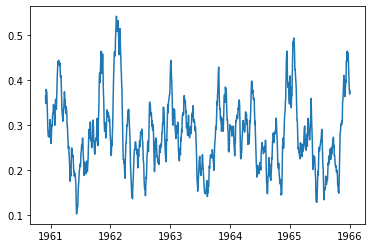

In [16]:
# plot the wind power data with a smoothing of 30
smooth30 = wind_power_df["United_Kingdom_wind_power"].rolling(window=30).mean()

# plot this with a smoothing of 30
fig, ax = plt.subplots()

plt.plot(smooth30)

### Loading model data ###

Now that we have loaded the obs data, we now want to load the model data and process this into 100m wind speeds before converting to wind power.

In [17]:
importlib.reload(lw_func)

<module 'load_wind_functions' from '/home/users/benhutch/unseen_functions/load_wind_functions.py'>

In [18]:
# Set up the months of data to load
months = [ 11,]

# set up the base_dir
base_dir = "/work/scratch-nopw2/benhutch/test_nc/"

variable_saved = "__xarray_dataarray_variable__"

# Set up an empty dataframe
combined_df = pd.DataFrame()

# Loop over the months
for month_idx in tqdm(months):

    # Set up the fname
    fname_month = f"{variable}_bias_correction_HadGEM3-GC31-MM_lead{lead_time}_month{month_idx}_init{first_year}-{last_year}.nc"

    # set up the path
    path = os.path.join(base_dir, fname_month)

    # assert that the path exists
    assert os.path.exists(path), f"Path does not exist: {path}"

    # Select the european domain
    ds = bias_func.select_gridbox(
        ds=xr.open_dataset(path),
        grid=udicts.eu_grid_constrained,
        calc_mean=False,
    )

    # Apply the country mask
    ds = lw_func.apply_country_mask(
        ds=ds,
        country=country,
        lon_name="lon",
        lat_name="lat",
    )

    # # print ds
    # print("ds type: ", type(ds))

    # # print ds type
    # print("type of ds[variable_saved]: ", type(ds[variable_saved]))

    # create wind power data
    cfs, _, wind_speed_post = lw_func.create_wind_power_data(
        ds=ds,
        country=country_name,
        ons_ofs="ons", # test onshore for now
        var_name=variable_saved,
        onshore_curve_file="/home/users/benhutch/Hannah_model/power_onshore.csv",
        offshore_curve_file="/home/users/benhutch/Hannah_model/power_offshore.csv",
        installed_capacities_dir="/home/users/benhutch/Hannah_model/installed_capacities/",
        lat_name="lat",
        lon_name="lon",
        corr_var_name="sfcWind",
        obs_flag=False,
    )

    # print the shape of CFs    
    print("cfs shape: ", cfs.shape)

    # Form the wind power dataframe
    wp_df = lw_func.form_wind_power_dataframe(
        cfs=cfs,
        ds=ds,
        country_name=country_name,
        obs_flag=False,
        model_fpath=test_file,
        init_year=first_year,
        leads=ds["lead"].values,
    )

    # Append to the combined dataframe
    combined_df = pd.concat([combined_df, wp_df], ignore_index=True)

  0%|          | 0/1 [00:00<?, ?it/s]

Found the country!
Pre-country mask
<xarray.Dataset>
Dimensions:                        (lat: 324, lon: 432)
Coordinates:
    lead                           int64 1
    init                           int64 1960
    member                         <U9 'r10i1p1f2'
  * lat                            (lat) float64 -89.72 -89.17 ... 89.17 89.72
  * lon                            (lon) float64 -179.6 -178.8 ... 178.7 179.6
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float64 nan nan nan ... nan nan
[-179.58333336 -178.75000007 -177.91666678 -177.0833335  -176.25000021
 -175.41666693 -174.58333364 -173.75000035 -172.91666707 -172.08333378
 -171.2500005  -170.41666721 -169.58333392 -168.75000064 -167.91666735
 -167.08333406 -166.25000078 -165.41666749 -164.58333421 -163.75000092
 -162.91666763 -162.08333435 -161.25000106 -160.41666778 -159.58333449
 -158.7500012  -157.91666792 -157.08333463 -156.25000134 -155.41666806
 -154.58333477 -153.75000149 -152.9166682  -152.08333491 -15

/home/users/benhutch/unseen_functions/load_wind_functions.py:841: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  power_curve = pd.read_csv(onshore_curve_file, header=None, sep="  ")


Country mask: <xarray.DataArray 'mask' (lat: 324, lon: 432)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon      (lon) float64 -179.6 -178.8 -177.9 -177.1 ... 177.9 178.7 179.6
Attributes:
    standard_name:  region
    flag_values:    [1]
    flag_meanings:  U.K.
Country mask coords: Coordinates:
  * lat      (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon      (lon) float64 -179.6 -178.8 -177.9 -177.1 ... 177.9 178.7 179.6
Masking out Northern Ireland.
<xarray.Dataset>
Dimensions:                        (init: 1, member: 10, lead: 30, lat: 324,
                                    lon: 432)
Coordinates:
  * lead                           (

100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

cfs shape:  (10, 30)
Dates: [cftime.Datetime360Day(1960, 11, 1, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 2, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 3, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 4, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 5, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 6, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 7, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 8, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 9, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 10, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 11, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 12, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 13, 0, 0, 0, 0, has_year_zero=True), cftime.Datetime360Day(1960, 11, 14, 0, 0, 0, 0, has_year_zero=True), cftime.Datetim

In [26]:
wind_speed_post

array([[0.00502974, 0.00447367, 0.0042816 , 0.00343037, 0.00212775,
        0.00202869, 0.00201835, 0.00185465, 0.00174486, 0.00183036,
        0.00347327, 0.0034855 , 0.00294714, 0.00435092, 0.00373258,
        0.00248591, 0.0022265 , 0.00265791, 0.00244992, 0.00421444,
        0.0043518 , 0.00273678, 0.0016696 , 0.00325578, 0.00403107,
        0.00424731, 0.0035992 , 0.0030876 , 0.00309445, 0.00321775],
       [0.00505924, 0.00441634, 0.00434658, 0.00337203, 0.00227063,
        0.00217784, 0.0020288 , 0.00184608, 0.00187037, 0.00173461,
        0.00361347, 0.00423846, 0.00388262, 0.00468999, 0.00397713,
        0.00231772, 0.00313315, 0.0036721 , 0.00327836, 0.00249556,
        0.00247605, 0.00210851, 0.00375836, 0.00550004, 0.00346149,
        0.0042806 , 0.00481016, 0.00405313, 0.00240566, 0.00199628],
       [0.00502468, 0.00451813, 0.00428197, 0.00347072, 0.00221535,
        0.00212311, 0.0020198 , 0.00187807, 0.00178066, 0.00168102,
        0.00379753, 0.00383176, 0.00392555, 0.

In [20]:
combined_df.head()

,date,lead,member,cfs
0,1960-11-01 00:00:00,1,1,0.618174
1,1960-11-01 00:00:00,1,2,0.624464
2,1960-11-01 00:00:00,1,3,0.616208
3,1960-11-01 00:00:00,1,4,0.619106
4,1960-11-01 00:00:00,1,5,0.620288


In [21]:
# # add a lead column to combined_df
# # one for each unique date
# combined_df["lead"] = np.tile(np.arange(1, 31), len(combined_df) // 30)

In [22]:
combined_df.head()

,date,lead,member,cfs
0,1960-11-01 00:00:00,1,1,0.618174
1,1960-11-01 00:00:00,1,2,0.624464
2,1960-11-01 00:00:00,1,3,0.616208
3,1960-11-01 00:00:00,1,4,0.619106
4,1960-11-01 00:00:00,1,5,0.620288


In [23]:
# add lead column to wind_power_df
wind_power_df["lead"] = np.arange(1, len(wind_power_df) + 1)

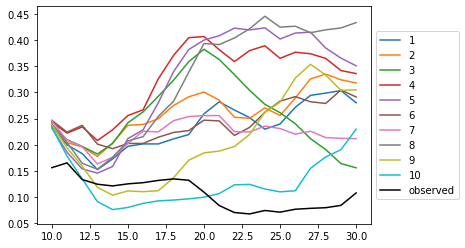

In [24]:
# # loop over the different members and plot the wind power data
# fig, ax = plt.subplots()

# for member in combined_df["member"].unique():
#     member_df = combined_df[combined_df["member"] == member]

#     # smooth the member by 10 days centred
#     member_df_smooth = member_df["cfs"].rolling(window=10).mean()

#     plt.plot(member_df["lead"], member_df_smooth, label=member)

# # # quantify a 5%-95% range
# # quantile_5 = member_df_smooth.groupby("lead")["cfs"].quantile(0.05)
# # quantile_95 = member_df_smooth.groupby("lead")["cfs"].quantile(0.95)

# # plt.fill_between(
# #     combined_df["lead"].unique(),
# #     quantile_5,
# #     quantile_95,
# #     alpha=0.2,
# #     color="black",
# #     label="5-95% range",
# # )

# # limit wind power data to 30 days
# wind_power_df_subset = wind_power_df.iloc[:30]

# # # plot the observed wind power data
# obs_smooth = wind_power_df_subset["United_Kingdom_wind_power"].rolling(window=10).mean()

# plt.plot(wind_power_df_subset["lead"], obs_smooth, label="observed", color="black")

# # plot the legend off to the side
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
wind_speed_post_obs.shape

(1887,)

In [21]:
wind_speed_post.shape

(10, 30)

In [22]:
# get these into a dataframe
wind_speed_post_obs_df = pd.DataFrame(wind_speed_post_obs)

In [23]:
# set up a lead column
wind_speed_post_obs_df["lead"] = np.arange(1, len(wind_speed_post_obs_df) + 1)

In [24]:
# set up column names
wind_speed_post_obs_df.columns = ["obs_100m_wind_speed_bc", "lead"]

In [25]:
wind_speed_post_obs_df

,obs_100m_wind_speed_bc,lead
0,0.005239,1
1,0.006592,2
2,0.004678,3
3,0.003948,4
4,0.003442,5
...,...,...
1882,0.003033,1883
1883,0.002044,1884
1884,0.004800,1885
1885,0.004628,1886


In [41]:
wind_speed_dfs = []

# loop over shape of 1th dimension
for i in range(1, wind_speed_pre.shape[1] + 1):

    # get the wind speed
    wind_speed = wind_speed_pre[:, i - 1]

    # print the wind speed shape
    print("wind_speed shape: ", wind_speed.shape)

    # get these into a dataframe
    wind_speed_df = pd.DataFrame({
        "wind_speed": wind_speed,
        "lead": [i] * len(wind_speed),
        "member": np.arange(1, wind_speed.shape[0] + 1),
    })

    # append to the list
    wind_speed_dfs.append(wind_speed_df)

# concatenate the dataframes
wind_speed_df = pd.concat(wind_speed_dfs, ignore_index=True)

wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)
wind_speed shape:  (10,)


In [42]:
wind_speed_df

,wind_speed,lead,member
0,7.824509,1,1
1,7.870400,1,2
2,7.816639,1,3
3,7.843580,1,4
4,7.844391,1,5
...,...,...,...
295,4.941010,30,6
296,3.122410,30,7
297,8.611777,30,8
298,5.019413,30,9


Text(0, 0.5, '10m wind speed (m/s)')

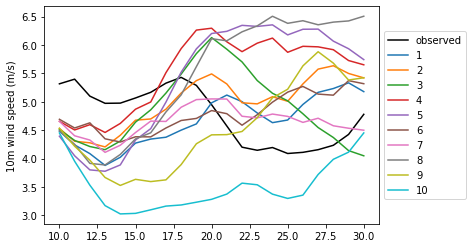

In [45]:
# set up a figure
fig, ax = plt.subplots()

# # subset df to 30 days
# wind_speed_pre_obs_df_subset = wind_speed_pre_obs_df.iloc[:30]

# take a rolling mean
obs_smooth = wind_speed_pre_obs_df_subset["obs_10m_wind_speed"].rolling(window=10).mean()

# plot the observed wind speed
plt.plot(wind_speed_pre_obs_df_subset["lead"], obs_smooth, label="observed", color="black")

# loop over the different members and plot the wind power data
for member in wind_speed_df["member"].unique():
    member_df = wind_speed_df[wind_speed_df["member"] == member]

    # smooth the member by 10 days centred
    member_df_smooth = member_df["wind_speed"].rolling(window=10).mean()

    plt.plot(member_df["lead"], member_df_smooth, label=member)

# plot the legend off to the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# add a ylabel
plt.ylabel("10m wind speed (m/s)")